In [1]:
import numpy as np
import pandas as pd

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Part (a)

In [5]:
orders_df = pd.read_csv('orders.txt',sep='\t', encoding='utf-16')

C:\Users\Dima\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
orders_df.sample(20)

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId,Месяцы,CustomerActionDateTimeUtc,CustomerActionChannelName
69399,418568,4644317.0,окт,27.окт,iOs приложение
151296,1063484,2614269.0,окт,29.окт,iOs приложение
66437,407273,4472778.0,ноя,27.ноя,Android приложение
73967,438198,3071192.0,окт,06.окт,Backoffice
45321,339629,913519.0,ноя,19.ноя,iOs приложение
7314,194519,4608778.0,окт,19.окт,Backoffice
94598,538148,3121081.0,ноя,01.ноя,Backoffice
30981,289232,1307910.0,сен,19.сен,Backoffice
12028,220210,4843852.0,дек,04.дек,iOs приложение
25614,269001,1222360.0,окт,04.окт,Android приложение


In [7]:
orders_df.shape

(204405, 5)

In [8]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204405 entries, 0 to 204404
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CustomerActionCustomerIdsCustomerID  204405 non-null  object 
 1   CustomerActionCustomerIdsMindboxId   204404 non-null  float64
 2   Месяцы                               204404 non-null  object 
 3   CustomerActionDateTimeUtc            204404 non-null  object 
 4   CustomerActionChannelName            204404 non-null  object 
dtypes: float64(1), object(4)
memory usage: 7.8+ MB


In [9]:
orders_df['Месяцы'].value_counts()

ноя    70336
окт    70139
дек    37965
сен    25964
Name: Месяцы, dtype: int64

In [10]:
orders_df.CustomerActionCustomerIdsCustomerID = pd.to_numeric(orders_df.CustomerActionCustomerIdsCustomerID, errors='coerce') 

In [11]:
orders_df.CustomerActionDateTimeUtc.replace(re.compile(r'сен'), 'Sep.2020', inplace = True)

In [12]:
orders_df.CustomerActionDateTimeUtc.replace(re.compile(r'окт'), 'Oct.2020', inplace = True)

In [13]:
orders_df.CustomerActionDateTimeUtc.replace(re.compile(r'ноя'), 'Nov.2020', inplace = True)

In [14]:
orders_df.CustomerActionDateTimeUtc.replace(re.compile(r'дек'), 'Dec.2020', inplace = True)

In [15]:
orders_df.CustomerActionDateTimeUtc = pd.to_datetime(orders_df.CustomerActionDateTimeUtc, format='%d.%b.%Y') 

In [16]:
orders_df.head()

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId,Месяцы,CustomerActionDateTimeUtc,CustomerActionChannelName
0,84.0,3227667.0,сен,2020-09-22,Backoffice
1,84.0,3227667.0,сен,2020-09-29,Backoffice
2,84.0,3227667.0,окт,2020-10-06,Backoffice
3,84.0,3227667.0,окт,2020-10-14,Backoffice
4,84.0,3227667.0,окт,2020-10-20,Backoffice


In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204405 entries, 0 to 204404
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   CustomerActionCustomerIdsCustomerID  204404 non-null  float64       
 1   CustomerActionCustomerIdsMindboxId   204404 non-null  float64       
 2   Месяцы                               204404 non-null  object        
 3   CustomerActionDateTimeUtc            204404 non-null  datetime64[ns]
 4   CustomerActionChannelName            204404 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.8+ MB


In [18]:
orders_df.dropna(inplace=True)

In [19]:
orders_df.CustomerActionCustomerIdsCustomerID = orders_df.CustomerActionCustomerIdsCustomerID.apply(lambda x: int(x))

In [20]:
orders_df.describe()

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId
count,2.044040e+05,2.044040e+05
mean,7.432317e+05,2.508900e+06
std,4.792339e+05,1.209690e+06
min,8.400000e+01,8.852080e+05
25%,3.575422e+05,1.305996e+06
50%,5.780480e+05,2.739236e+06
75%,1.095590e+06,3.380431e+06
max,2.364224e+06,5.439915e+06


In [21]:
reviews_df = pd.read_csv('reviews_clean.csv', sep=';', encoding='windows-1251')

In [22]:
reviews_df.head()

,id клиента,дата создания,оценка заказа
0,1754426,2020-12-15 23:59:00,5
1,2374089,2020-12-15 23:59:00,5
2,523473,2020-12-15 23:58:00,3
3,2202841,2020-12-15 23:58:00,2
4,438709,2020-12-15 23:57:00,4


In [23]:
reviews_df.shape

(45514, 3)

In [24]:
reviews_df.describe()

,id клиента,оценка заказа
count,4.551400e+04,45514.000000
mean,1.643380e+06,4.525487
std,6.834167e+05,1.046991
min,1.484910e+05,1.000000
25%,1.093740e+06,5.000000
50%,1.910700e+06,5.000000
75%,2.240922e+06,5.000000
max,2.383143e+06,5.000000


In [25]:
# Merge reviews and orders

In [26]:
rev_ord_df = orders_df.merge(reviews_df, how='inner', left_on='CustomerActionCustomerIdsCustomerID', right_on='id клиента')

In [27]:
rev_ord_df.head()

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId,Месяцы,CustomerActionDateTimeUtc,CustomerActionChannelName,id клиента,дата создания,оценка заказа
0,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5
1,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5
2,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5
3,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5
4,148491,3577000.0,окт,2020-10-02,Android приложение,148491,2020-09-12 01:20:00,5


In [28]:
rev_ord_df.shape

(47002, 8)

In [29]:
# Средняя оценка по всем заказам

In [30]:
rev_ord_df['оценка заказа'].mean()

4.382643291774818

Text(0.5, 1.0, 'Суммарное количество заказов по каждой оценке')

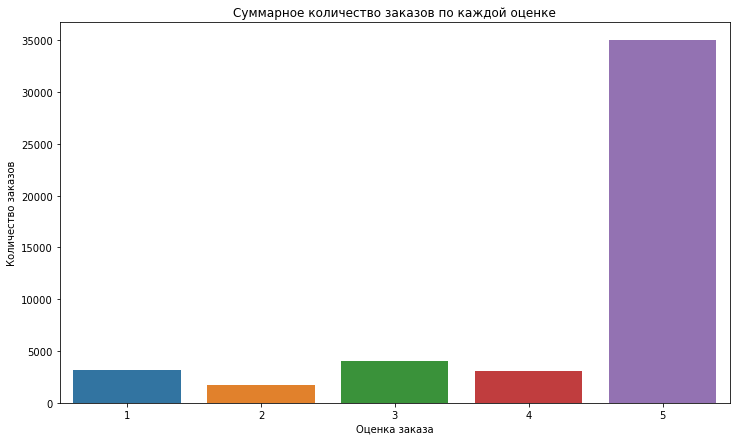

In [31]:
plt.figure(figsize=[12, 7])
sns.countplot(data=rev_ord_df, x='оценка заказа')
plt.xlabel('Оценка заказа')
plt.ylabel('Количество заказов')
plt.title('Суммарное количество заказов по каждой оценке')

In [32]:
# Найдем среднюю оценку по каждому клиенту

In [33]:
rev_ord_df.CustomerActionCustomerIdsCustomerID.nunique()

2013

In [34]:
cust_reviews_avg = rev_ord_df.groupby('CustomerActionCustomerIdsCustomerID')['оценка заказа'].mean()

In [35]:
cust_reviews_avg = pd.DataFrame(cust_reviews_avg)

In [36]:
cust_reviews_avg.reset_index(inplace=True)

In [37]:
cust_reviews_avg.head()

,CustomerActionCustomerIdsCustomerID,оценка заказа
0,148491,5.000000
1,150217,3.000000
2,151387,5.000000
3,151852,5.000000
4,153097,3.666667


Text(0.5, 1.0, 'Средняя оценка заказа по каждому клиенту')

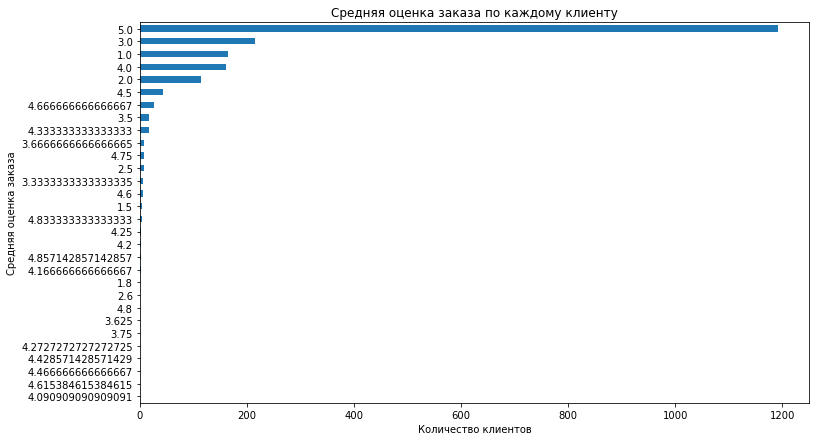

In [38]:
plt.figure(figsize=[12, 7])
cust_reviews_avg.groupby('оценка заказа')['CustomerActionCustomerIdsCustomerID'].count().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Количество клиентов')
plt.ylabel('Средняя оценка заказа')
plt.title('Средняя оценка заказа по каждому клиенту')

In [39]:
# Большинство клиентов (около 1200) имеют средннюю оценку заказа "5" баллов в интервале Сентябрь-Декабрь.

In [40]:
# Чуть более 200 клиентов удовлетворены заказами в данном временом интервале: средний балл "3".

In [41]:
# Около 200 клиентов крайне недовольны заказами в данном временом промежутке: средний балл "1".

In [42]:
# Около 200 клиентов вполне удовлетворены заказами в данном временом промежутке: средний балл "4"

In [43]:
# Таким оразом, около 70% (1400 клиентов из 2013) "хороших клиентов" остались довольны (средние оценки "4" и "5") 
# заказами, сделанными с Сентября по Декабрь. Около 10% (200 клиентов из 2013) были крайне недовольны заказами 
# в данном интервале (средняя оценка "1").

In [44]:
# На мой взгляд, оценка "3" является наиболее подходящим порогом отсечения "хороших" и "плохих" оценок.

In [45]:
# Part (b)

In [46]:
rev_ord_df.head()

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId,Месяцы,CustomerActionDateTimeUtc,CustomerActionChannelName,id клиента,дата создания,оценка заказа
0,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5
1,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5
2,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5
3,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5
4,148491,3577000.0,окт,2020-10-02,Android приложение,148491,2020-09-12 01:20:00,5


In [47]:
rev_ord_df['ActionDateNext'] = rev_ord_df.groupby('CustomerActionCustomerIdsCustomerID')['CustomerActionDateTimeUtc'].shift(-1)

In [48]:
rev_ord_df.head(10)

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId,Месяцы,CustomerActionDateTimeUtc,CustomerActionChannelName,id клиента,дата создания,оценка заказа,ActionDateNext
0,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5,2020-09-23
1,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5,2020-09-23
2,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5,2020-09-23
3,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5,2020-10-02
4,148491,3577000.0,окт,2020-10-02,Android приложение,148491,2020-09-12 01:20:00,5,2020-10-02
5,148491,3577000.0,окт,2020-10-02,Android приложение,148491,2020-09-12 01:20:00,5,2020-10-08
6,148491,3577000.0,окт,2020-10-08,Backoffice,148491,2020-09-12 01:20:00,5,2020-10-08
7,148491,3577000.0,окт,2020-10-08,Backoffice,148491,2020-09-12 01:20:00,5,2020-10-26
8,148491,3577000.0,окт,2020-10-26,Backoffice,148491,2020-09-12 01:20:00,5,2020-10-26
9,148491,3577000.0,окт,2020-10-26,Backoffice,148491,2020-09-12 01:20:00,5,2020-11-12


In [49]:
rev_ord_df['DaysSincelastorder'] = rev_ord_df['ActionDateNext'] - rev_ord_df['CustomerActionDateTimeUtc']

In [50]:
rev_ord_df['DaysSincelastorder'] = rev_ord_df['DaysSincelastorder'].dt.days

In [51]:
# Средня частота заказаов по всем клиентам в исследуемом интервале

In [52]:
rev_ord_df['DaysSincelastorder'].mean()

3.3824934984107227

In [53]:
# В среднем, инервал между заказами сосавляет приблзительно 3.5 дня

In [54]:
rev_ord_df['PreviousRating'] = rev_ord_df.groupby('CustomerActionCustomerIdsCustomerID')['оценка заказа'].shift(1)

In [55]:
rev_ord_df.head()

,CustomerActionCustomerIdsCustomerID,CustomerActionCustomerIdsMindboxId,Месяцы,CustomerActionDateTimeUtc,CustomerActionChannelName,id клиента,дата создания,оценка заказа,ActionDateNext,DaysSincelastorder,PreviousRating
0,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5,2020-09-23,0.0,NaN
1,148491,3577000.0,сен,2020-09-23,Android приложение,148491,2020-09-12 01:20:00,5,2020-09-23,0.0,5.0
2,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5,2020-09-23,0.0,5.0
3,148491,3577000.0,сен,2020-09-23,Backoffice,148491,2020-09-12 01:20:00,5,2020-10-02,9.0,5.0
4,148491,3577000.0,окт,2020-10-02,Android приложение,148491,2020-09-12 01:20:00,5,2020-10-02,0.0,5.0


Text(0.5, 1.0, 'Сравнение среднего интревала (в днях) между заказами по предыдущей оценке заказа')

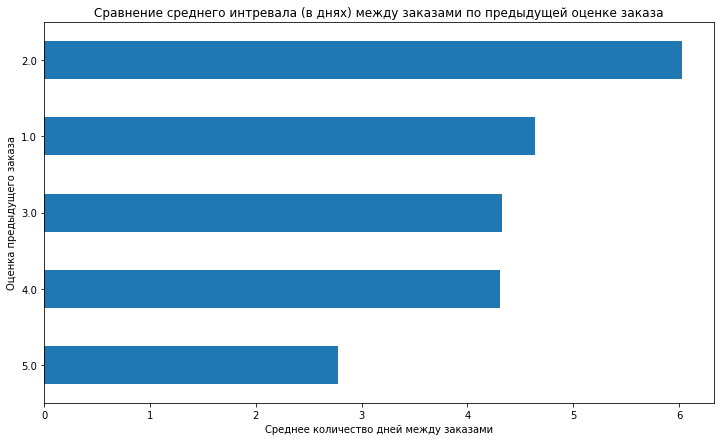

In [56]:
plt.figure(figsize=[12,7])
rev_ord_df.groupby('PreviousRating')['DaysSincelastorder'].mean().sort_values().plot(kind='barh')
plt.xlabel('Среднее количество дней между заказами')
plt.ylabel('Оценка предыдущего заказа')
plt.title('Сравнение среднего интревала (в днях) между заказами по предыдущей оценке заказа')

In [57]:
# Таким образом, если клиент поставил оценку "5", тогда, вероятнее всего, 
# он воспользуется сервисом в течение последующих 3 дней. Если же клиент поставил оценку "2", тогда,
# в среднем, он воспользуется сервисом повторно приблизительно через 6 дней.

In [58]:
# Даже при высокой оценке заказа, крайне маловероятно, что клиент воспользуется сервисом в течение 
# последующих 2 дней. Большинство заказов осуществляются в интервале от 3 до 6 дней с момента последнего 
# заказа. Таким образом, данный интервал будет наиболее информативным при дальнейшем анализе.